In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
reviews_train = load_files('C:/Users/Admin/Desktop/PythonProjects/aclImdb/train',
    categories=['pos', 'neg'])

text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [3]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [4]:
lda = LatentDirichletAllocation(n_components=10, learning_method='batch',
    max_iter=25, random_state=0, n_jobs=-1)

document_topics = lda.fit_transform(X)

print(lda.components_.shape)

(10, 10000)


In [5]:
import numpy as np
import mglearn

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
    sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       thought       
real          american      laugh         tv            am            
us            our           jokes         episodes      thing         
director      documentary   fun           shows         got           
work          history       humor         season        10            
both          years         re            new           want          
beautiful     new           hilarious     years         going         
each          human         doesn         television    watched       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [6]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch',
    max_iter=25, random_state=0)

document_topics100 = lda100.fit_transform(X)

In [7]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

mglearn.tools.print_topics(topics, feature_names, sorting, 7, 20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

In [8]:
music = np.argsort(document_topics100[:, 45])[::-1]

for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

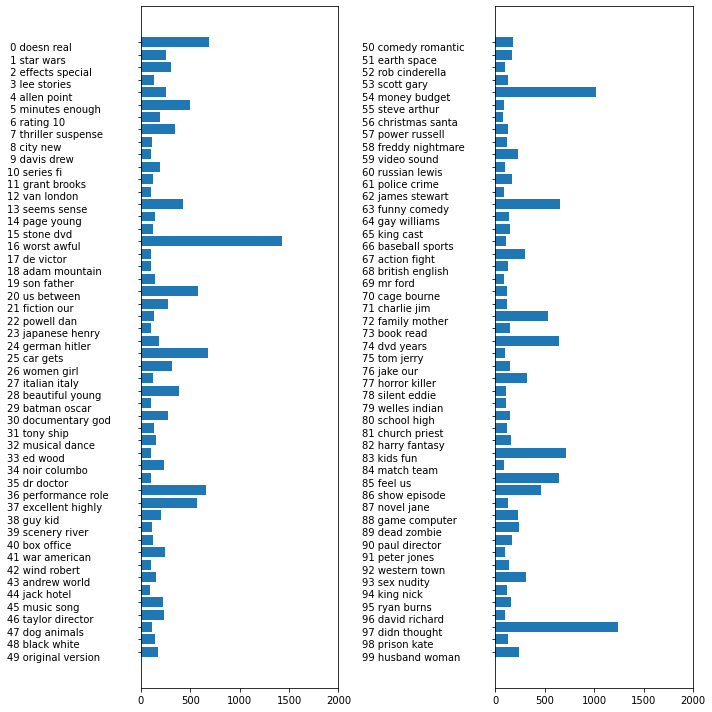

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words) 
    for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50

    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()